In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/titanic.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://homl.info/titanic.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as titanic:
            titanic.extractall(path="datasets")
    return pd.read_csv(Path("datasets/titanic/train.csv")), pd.read_csv(Path("datasets/titanic/test.csv"))

train, test = load_housing_data()

In [20]:
columns_des = pd.DataFrame(
    [["survival","Survival","0 = No, 1 = Yes"],
    ["pclass","Ticket class","1 = 1st, 2 = 2nd, 3 = 3rd"],
    ["sex","Sex",""],
    ["Age","Age in years",""],
    ["sibsp","# of siblings / spouses aboard the Titanic",""],
    ["parch","# of parents / children aboard the Titanic",""],
    ["ticket","Ticket number",""],
    ["fare","Passenger fare",""],
    ["cabin","Cabin number",""],
    ["embarked","Port of Embarkation","C = Cherbourg, Q = Queenstown, S = Southampton"]],
    columns=['Variable', "Definition", "Key"]
)
columns_des

,Variable,Definition,Key
0,survival,Survival,"0 = No, 1 = Yes"
1,pclass,Ticket class,"1 = 1st, 2 = 2nd, 3 = 3rd"
2,sex,Sex,
3,Age,Age in years,
4,sibsp,# of siblings / spouses aboard the Titanic,
5,parch,# of parents / children aboard the Titanic,
6,ticket,Ticket number,
7,fare,Passenger fare,
8,cabin,Cabin number,
9,embarked,Port of Embarkation,"C = Cherbourg, Q = Queenstown, S = Southampton"


In [83]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# X_train = train.drop('Survived', axis=1)
# y_train = train['Survived']
X_train = train.copy()
X_train.set_index('PassengerId', inplace=True)
# test.set_index('PassengerId', inplace=True)

In [86]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [87]:
X_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699113,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526507,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.416700,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### findings
1. there are 177 rows with missing ages: fill mean
2. there are 687 rows with missing Cabin: drop the column
3. there are 2 rows with missing Embarked: drop these two rows

In [61]:
# fill average ages for nan value
X_train['Age'] = X_train['Age'].fillna(X_train['Age'].mean())
X_train.drop('Cabin', axis=1, inplace=True)
X_train.dropna(subset='Embarked', axis=0, inplace=True)

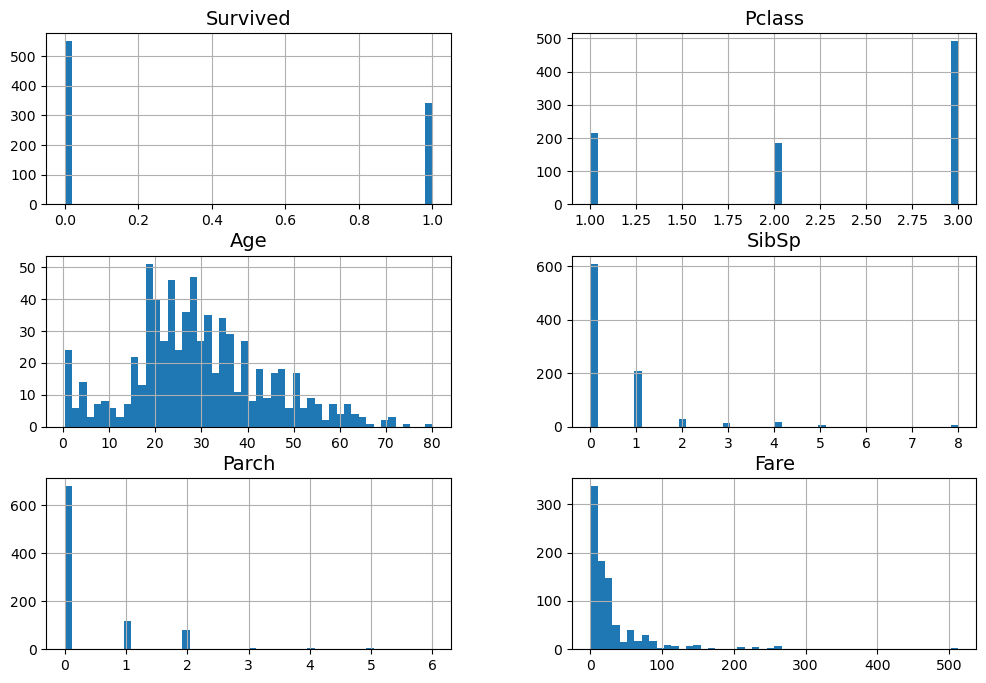

In [88]:
# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

X_train.hist(bins=50, figsize=(12, 8))
plt.show()

In [105]:
X_train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

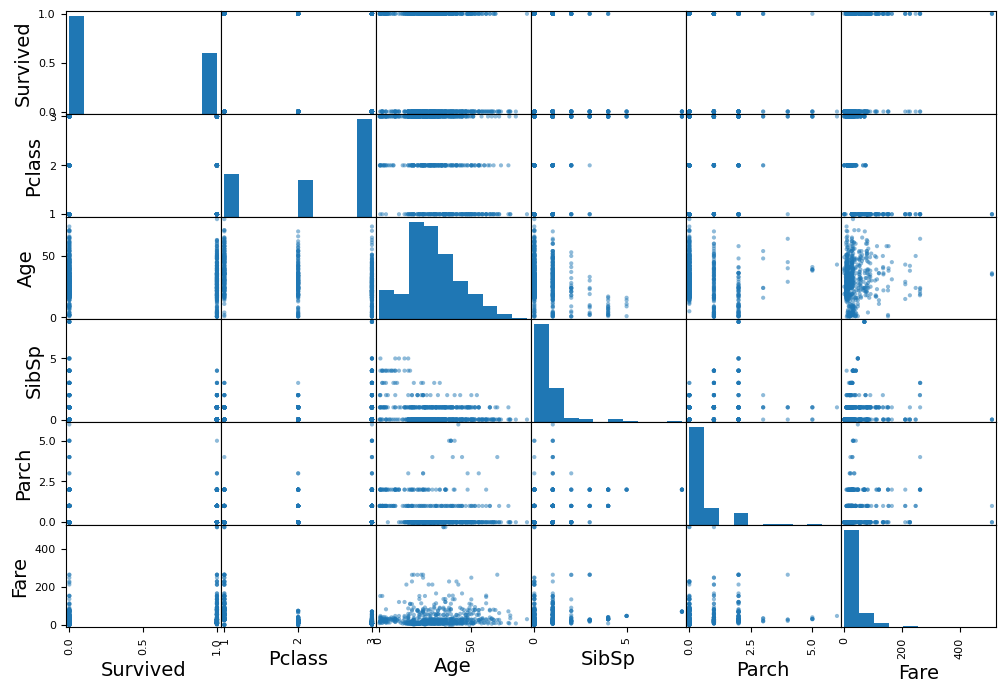

In [89]:
from pandas.plotting import scatter_matrix

scatter_matrix(X_train.select_dtypes(include=[np.number]), figsize=(12, 8))
plt.show()

<AxesSubplot:>

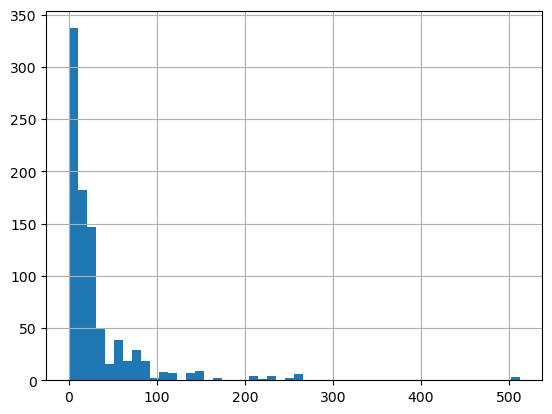

In [13]:
X_train['Fare'].hist(bins=50)

In [100]:
from sklearn.preprocessing import FunctionTransformer
log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(X_train.loc[X_train['Fare']!=0, 'Fare'])

array([[<AxesSubplot:title={'center':'Fare'}>]], dtype=object)

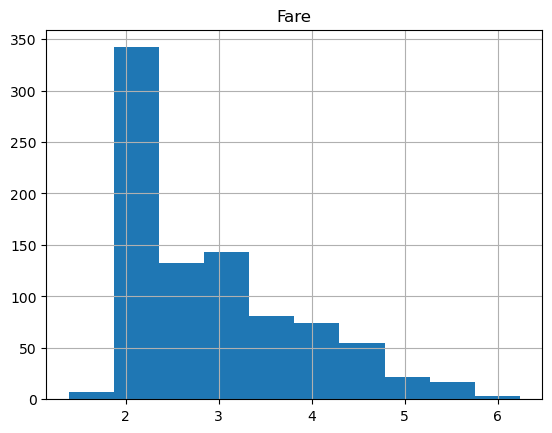

In [102]:
pd.DataFrame(log_pop).hist()

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

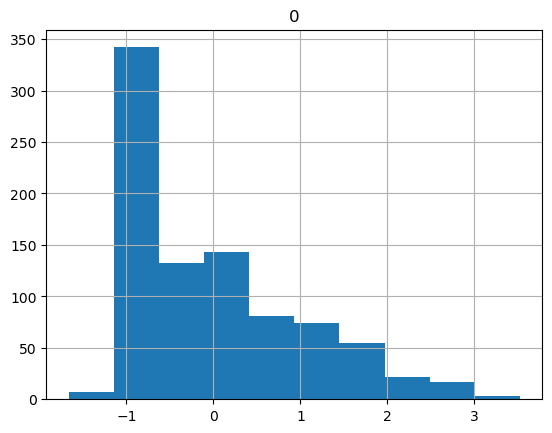

In [104]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
std_fare = std_scaler.fit_transform(log_pop.to_frame())
pd.DataFrame(std_fare).hist(bins=10)

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

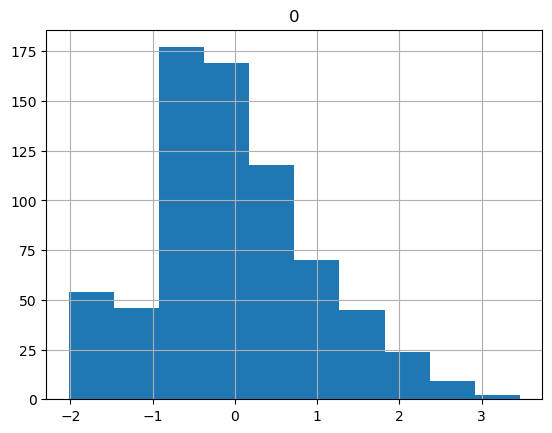

In [98]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
std_fare = std_scaler.fit_transform(X_train['Age'].to_frame())
pd.DataFrame(std_fare).hist(bins=10)

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

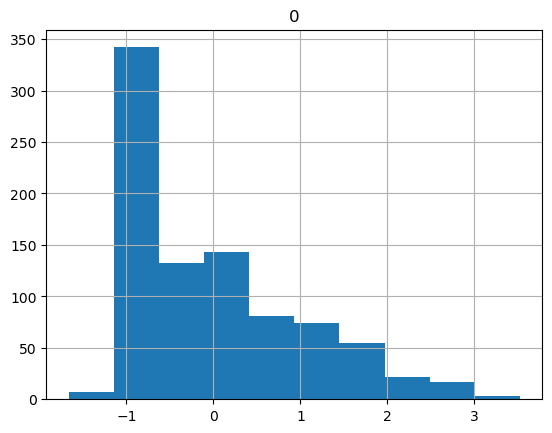

In [72]:
pd.DataFrame(std_fare).hist(bins=10)

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

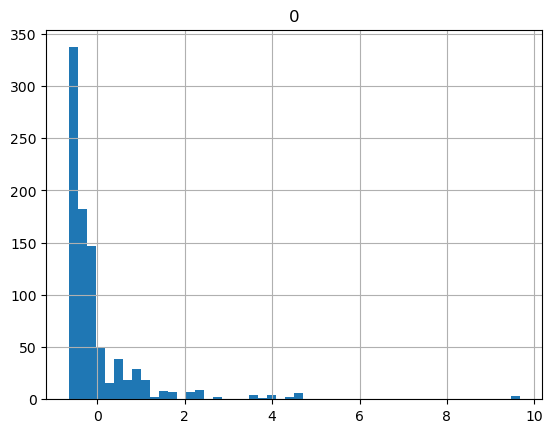

In [43]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
std_fare = std_scaler.fit_transform(np.array(np.array(X_train.loc[:, 'Fare']).reshape(-1,1)))
pd.DataFrame(std_fare).hist(bins=50)

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

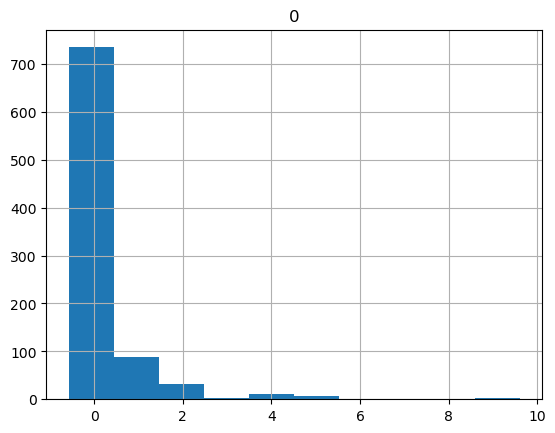

In [35]:
pd.DataFrame(std_fare).hist()

In [31]:
np.array(X_train.loc[X_train['Fare']!=0, 'Fare']).reshape(-1,1)

array([[  7.25  ],
       [ 71.2833],
       [  7.925 ],
       [ 53.1   ],
       [  8.05  ],
       [  8.4583],
       [ 51.8625],
       [ 21.075 ],
       [ 11.1333],
       [ 30.0708],
       [ 16.7   ],
       [ 26.55  ],
       [  8.05  ],
       [ 31.275 ],
       [  7.8542],
       [ 16.    ],
       [ 29.125 ],
       [ 13.    ],
       [ 18.    ],
       [  7.225 ],
       [ 26.    ],
       [ 13.    ],
       [  8.0292],
       [ 35.5   ],
       [ 21.075 ],
       [ 31.3875],
       [  7.225 ],
       [263.    ],
       [  7.8792],
       [  7.8958],
       [ 27.7208],
       [146.5208],
       [  7.75  ],
       [ 10.5   ],
       [ 82.1708],
       [ 52.    ],
       [  7.2292],
       [  8.05  ],
       [ 18.    ],
       [ 11.2417],
       [  9.475 ],
       [ 21.    ],
       [  7.8958],
       [ 41.5792],
       [  7.8792],
       [  8.05  ],
       [ 15.5   ],
       [  7.75  ],
       [ 21.6792],
       [ 17.8   ],
       [ 39.6875],
       [  7.8   ],
       [ 76.

ValueError: supplied range of [-inf, 6.238967387173662] is not finite

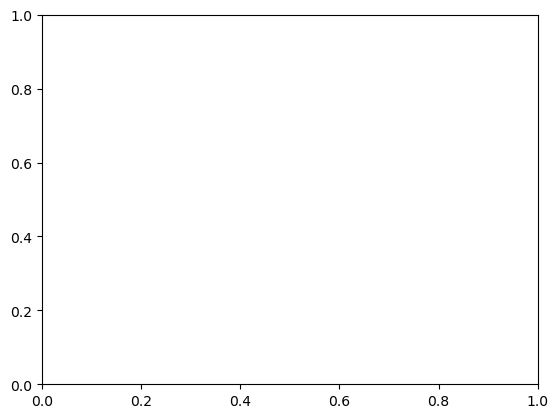

In [11]:
X_train['Fare'].apply(np.log).hist()